In [1]:
from sklearn import linear_model
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


import scipy.optimize as spopt
import sklearn
import sklearn.linear_model

### Generate Data to fit

#### To keep it simple, we will generate data that comes from the function sin(x), for $-\pi \le x\le pi$.

We add noise (eps) to the signal, to emulate partial corruption. How the results below change as a function of the noise strength is of interest.

One important concept that will pervade our efforts to do machine learning is to split the data into test data and training data. We will fit the model on the training data, but then we evaluate how well it works on the test data.
We will see in what follows that even in simple linear problems like the one we are carrying out here, overfitting is possible. This means that the fitting function models the peculiarities of the (noisy) sample we have drawn and it doesnt generalize to more complex datasets.

Building generalizable models is the crux of the matter

In [2]:
n=30  # number of points
x_train= np.random.random(size=(n,1)).reshape(n,1)*np.pi*2-np.pi
x_test=np.linspace(-np.pi,np.pi,100).reshape(100,1)

In [3]:
x_train.shape

(30, 1)

In [684]:
eps=0.1  # noise strength
y=np.sin(x_train)+ eps*np.random.randn(n,1)


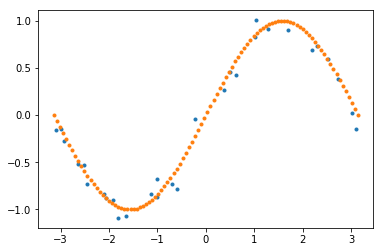

In [685]:
plt.plot(x_train,y,'.')
plt.plot(x_test,np.sin(x_test),'.')
plt.show()

### Now we move onto make Polynomial fits...

In [686]:
def poly_basis(X, d):
    """Returns a polynomial of degree d-1.  
    
    Args:
        X: data array, that is n x 1
        d: degree of the polynomial
    Returns:
        coefficient matrix of the polynomials n x d """
    return np.power(X, np.arange(0, d))

In [687]:
# Generate A matrix -- this is n x d, consisting of powers up to x^(d-1)
d = 20
A = poly_basis(x_train, d)

In [688]:
A.shape

(30, 20)

In [689]:
# Us sklearn to do linear regression
answer = sklearn.linear_model.LinearRegression().fit(A, y)


In [690]:
# prediction of training answer
y_train=answer.predict(poly_basis(x_train,d))

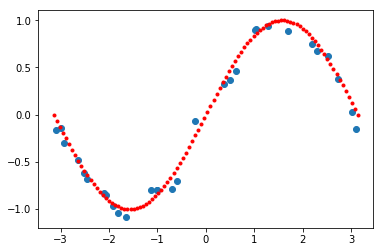

In [691]:
plt.scatter(x_train,y_train)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.show()

### This seems good, no?

Lets try to make predictions for a {\it different} set of points.

In [692]:
y_test=answer.predict(poly_basis(x_test,d))

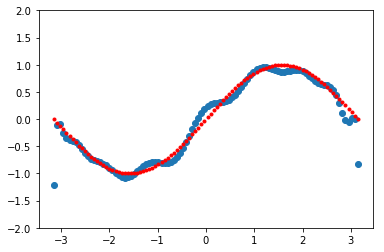

In [693]:
plt.scatter(x_test,y_test)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()

In [694]:
answer.coef_

array([[  0.00000000e+00,   8.08442978e-01,  -2.25686620e+00,
          9.11425596e-01,   5.12380204e+00,  -1.80948981e+00,
         -4.86192253e+00,   1.37437719e+00,   2.40686278e+00,
         -5.63296005e-01,  -6.87060767e-01,   1.36112034e-01,
          1.17311214e-01,  -1.99615121e-02,  -1.18224906e-02,
          1.74707171e-03,   6.48200379e-04,  -8.39882652e-05,
         -1.48988236e-05,   1.70811849e-06]])

## Regularization -- Ridge regression

We are now optimizing $$|A x - y|^2 + \lambda |x|^2$$

In [706]:
ridge = linear_model.Ridge(alpha=1, fit_intercept=False)
ridge.fit(A, y)

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [707]:
ridge.coef_

array([[ -2.18878345e-02,   5.65735103e-01,   2.80784300e-03,
          2.17510350e-01,   3.37828594e-02,   4.62638403e-02,
         -2.49398396e-04,  -4.15411511e-02,  -2.91330059e-02,
         -4.58285779e-02,   1.57530800e-02,   3.26712581e-02,
         -3.53850603e-03,  -8.38310102e-03,   3.98528380e-04,
          1.06826527e-03,  -2.21534943e-05,  -6.80832412e-05,
          4.80955380e-07,   1.73436295e-06]])

In [708]:
regularized_answer=ridge.predict(poly_basis(x_train,d))

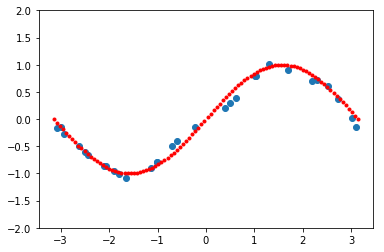

In [709]:
plt.scatter(x_train,regularized_answer)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()

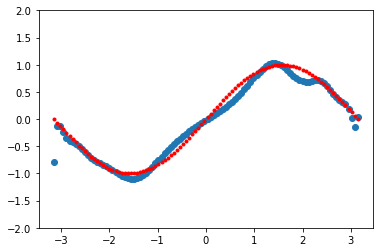

In [710]:
y_reg_test=ridge.predict(poly_basis(x_test,d))
plt.scatter(x_test,y_reg_test)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()

### what goes wrong?

Use SVD to examine the size of the singular values. See class discussion.

In [711]:
U,S,V=np.linalg.svd(A)

In [712]:
S

array([  3.51938891e+09,   1.14716604e+09,   1.39220732e+07,
         4.78063714e+06,   2.22687074e+05,   8.36715347e+04,
         4.78938530e+03,   1.96756965e+03,   1.98937395e+02,
         8.09371363e+01,   1.53130753e+01,   8.57635441e+00,
         3.44591619e+00,   3.09405795e+00,   1.13930021e+00,
         8.53906708e-01,   2.41888012e-01,   1.69165241e-01,
         3.84411250e-02,   1.71204899e-02])

The minimum singular value has a size of O(1e-3). This amplifies errors enormously

### Lasso
Another regularization procedure that uses L1 penalty instead

In [713]:
my_lasso = linear_model.Lasso(alpha=0.1)
my_lasso.fit(A, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [714]:
lasso_answer=my_lasso.predict(poly_basis(x_train,d))
y_lasso_test=my_lasso.predict(poly_basis(x_test,d))

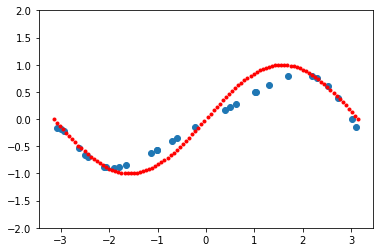

In [715]:
plt.scatter(x_train,lasso_answer)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()

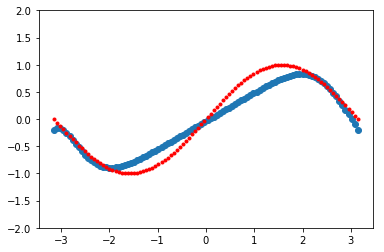

In [716]:
plt.scatter(x_test,y_lasso_test)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()

### Random Matrix Theory

What is odd about all of this regularization stuff is that we are imposing arbitrary cost functions on what was our particularly good problem. This is imposing constraints that are different than what we had thought about initially.

Here is another approach: 
we showed in class that the solution to the overdetermined least squares problem is:

inv(A^TA) * A^T y.

We have also discussed how small singular values of A get us in trouble.

Maybe we could therefore solve the problem by simply getting rid of the small singular values when carrying out this
inversion?  It seems possible that by simply truncating the smallest eigenvalues, we could achieve the same goal without doing something arbitrary.

In [717]:
# Generate an A matrix which is massively underdetermined, to see how this will go.
d = 10
A = poly_basis(x_train, d)

In [718]:
def approx_inverse(B,N,rhs):
    """approximately invert matrix cutting off the lower eigenvalues.
    This computes the pseudo-inverse of the matrix B.T*B, and keeps the first N highest eigenvalues.
    
    Inputs:
        B: Matrix that we want to invert.
        N: How many of the top modes we want to keep.
        rhs: right hand side we want to return inv(B)*rhs
        
    Returns:
        inv(B)*rhs"""
    
    eigval,eigvec = np.linalg.eig(np.dot(B.T,B))
    
    mat=np.zeros(np.dot(B.T,B).shape)
    for i in xrange(N):
        mat = mat + np.outer(eigvec[:,i],eigvec[:,i])/eigval[i]
        
    return np.dot(mat,rhs)

In [727]:
# we compute the coefficients of the expansion by keeping a number of coefficients
coeff=approx_inverse(A,10,np.dot(A.T,y))

In [728]:
dummy=poly_basis(x_test,d) # this generates the matrix of powers of x for each of the x_test points

In [729]:
yguess=np.dot(dummy,coeff)  # generate the set of guesses from this procedure.

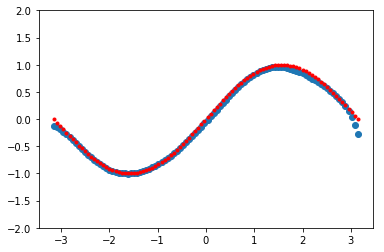

In [730]:
plt.scatter(x_test,yguess)
plt.plot(x_test,np.sin(x_test),'.',color='red')
plt.ylim((-2,2))
plt.show()


## Random Matrix Theory


In [588]:
M=np.random.randn(100,50)

In [600]:
m_cov=np.cov(M.T)

In [601]:
m_cov.shape

(50, 50)

In [602]:
eig,evec=np.linalg.eig(m_cov)

In [621]:
p=50
n=100.
gamma=p/n
upper=np.power((1+np.sqrt(gamma)),2)
lower=np.power((1-np.sqrt(gamma)),2)

xx=np.linspace(lower,upper,100)
MP=lambda x: np.sqrt(upper-x)*np.sqrt(x-lower)/(2*np.pi*x*gamma)

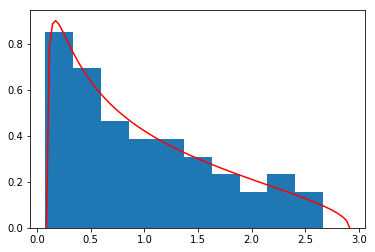

In [638]:

plt.hist(eig,normed=True)
plt.plot(xx,MP(xx),c='r')
plt.show()